#News Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import preprocessing
import re
import warnings
warnings.filterwarnings("ignore")

#Exploratory Data Analysis 

In [ ]:
BBC_DataSet=pd.read_csv("bbc-text.csv")

In [ ]:
BBC_DataSet

,Category,Text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
Lables=BBC_DataSet['Category'].unique()
Lables

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [ ]:
BBC_DataSet.shape

(2225, 2)

In [ ]:
BBC_DataSet.dtypes

Category    object
Text        object
dtype: object

In [ ]:
BBC_DataSet.isnull().any()

Category    False
Text        False
dtype: bool

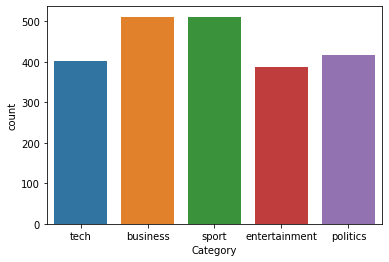

In [ ]:
sns.countplot(BBC_DataSet.Category)

In [ ]:
BBC_DataSet['News_length']=BBC_DataSet['Text'].str.len()

In [ ]:
BBC_DataSet['News_length']

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: News_length, Length: 2225, dtype: int64

In [ ]:
BBC_DataSet['News_length'].max()

25483

Text(0.5, 1.0, 'New_length')

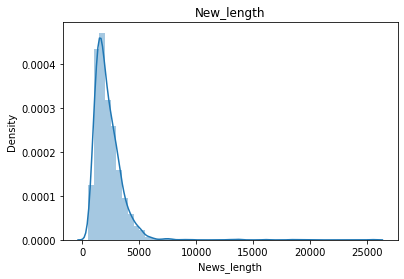

In [ ]:
sns.distplot(BBC_DataSet['News_length']).set_title('New_length')

#Creating WordCloud

In [ ]:
##size of each word indicates its frequency or importance
def create_wordcloud(words):
  wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

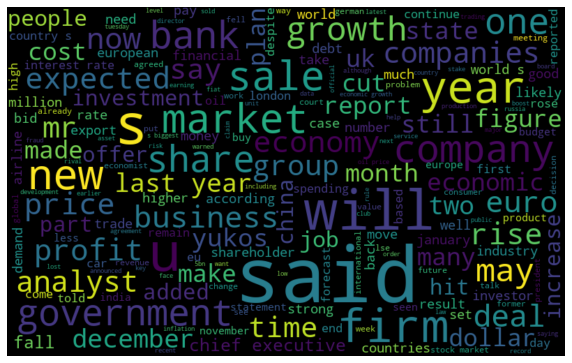

In [ ]:
subset=BBC_DataSet[BBC_DataSet.Category=="business"]
text_=subset.Text.values
words= ' '.join(text_)
create_wordcloud(words)


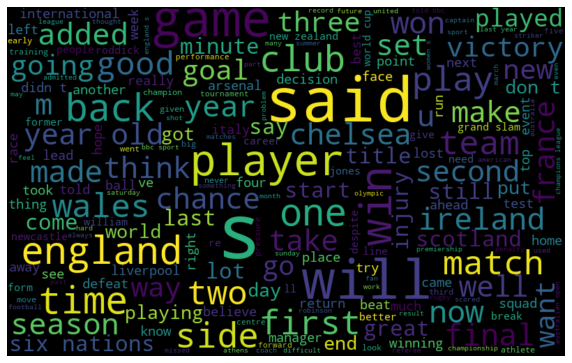

In [ ]:
subset=BBC_DataSet[BBC_DataSet.Category=="sport"]
text_=subset.Text.values
words= ' '.join(text_)
create_wordcloud(words)

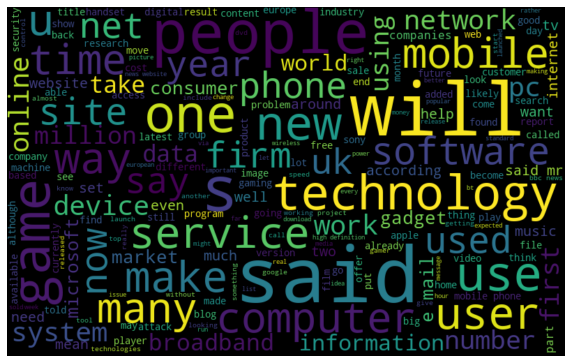

In [ ]:
subset=BBC_DataSet[BBC_DataSet.Category=="tech"]
text_=subset.Text.values
words= ' '.join(text_)
create_wordcloud(words)

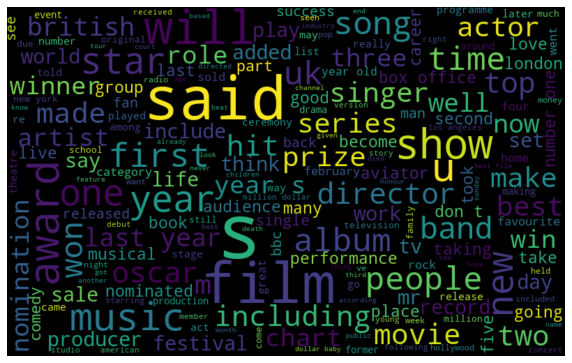

In [ ]:
subset=BBC_DataSet[BBC_DataSet.Category=="entertainment"]
text_=subset.Text.values
words= ' '.join(text_)
create_wordcloud(words)

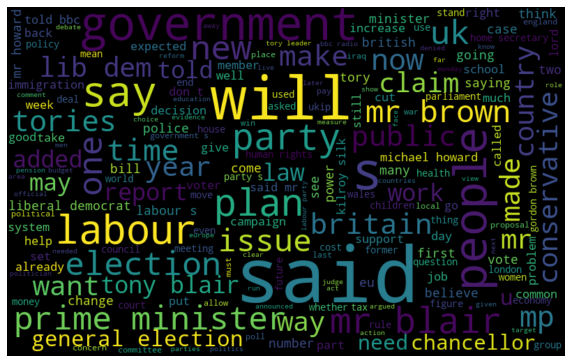

In [ ]:
subset=BBC_DataSet[BBC_DataSet.Category=="politics"]
text_=subset.Text.values
words= ' '.join(text_)
create_wordcloud(words)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Cleaning Data To convert into Pre-processing Data

In [ ]:
stop_words = set(stopwords.words('english')) 

def process_text(text):
    
    text = text.lower() # Lowering letters
    text = re.sub('<[^>]*>', '', text) # Removing html tags
    text = re.sub('\S*@\S*\s?', '', text) # Removing emails
    text = re.sub('https?://[A-Za-z0-9]','',text)  # Removing urls
    text = re.sub('[^a-zA-Z]',' ',text) # Removing numbers
    word_tokens = word_tokenize(text)    

    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)
    
    text = (' '.join(filtered_sentence))
    return text

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
BBC_DataSet['New_Text']=BBC_DataSet['Text'].apply(process_text)

In [ ]:
BBC_DataSet.head()

,Category,Text,News_length,New_Text
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


#Label Encoding

In [ ]:
label_encoder=preprocessing.LabelEncoder()
BBC_DataSet['Category_target'] = label_encoder.fit_transform(BBC_DataSet['Category']) 



In [ ]:
BBC_DataSet.head()

,Category,Text,News_length,New_Text,Category_target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


In [ ]:
category = BBC_DataSet[['Category', 'Category_target']].drop_duplicates().sort_values('Category_target')
category

,Category,Category_target
1,business,0
4,entertainment,1
5,politics,2
2,sport,3
0,tech,4


In [ ]:
BBC_DataSet.to_csv('BBC_NEWS.csv')

#Spliting Actual Data into Training and Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(BBC_DataSet['New_Text'], BBC_DataSet['Category_target'], test_size=0.2, random_state=8)

In [ ]:
X_train

783     injury doubts beset wales squad wales clutch i...
1752    abba reunite musical premiere original stars s...
1140    film star fox behind theatre bid leading actor...
806     china keeps tight rein credit china efforts st...
1368    uk apology colonial past days britain apologis...
                              ...                        
986     video phone help deaf people deaf people prefe...
2181    women film earning less women uk film industry...
2033    car giant hit mercedes slump slump profitabili...
1364    evil twin fear wireless net people using wirel...
451     mg rover china tie delayed mg rover proposed t...
Name: New_Text, Length: 1780, dtype: object

In [ ]:
X_train.shape

(1780,)

#TFIDF ()

In [ ]:
TFIDF = TfidfVectorizer(encoding='utf-8',ngram_range=(1,2),stop_words=None,lowercase=False,max_features=300,
                        norm='l2',sublinear_tf=True)

In [ ]:
features_train = TFIDF.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = TFIDF.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
print(features_train)

(1780, 300)
(445, 300)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.1294456 ]
 [0.         0.         0.         ... 0.06372226 0.         0.20384355]
 ...
 [0.         0.         0.         ... 0.18099492 0.         0.        ]
 [0.         0.08835543 0.         ... 0.         0.         0.        ]
 [0.         0.29601866 0.         ... 0.         0.         0.        ]]


#Using logistic Regression Model

In [ ]:
model_LR= LogisticRegression()
model_LR.fit(features_train, labels_train)
model_predictions = model_LR.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9640449438202248
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       1.00      0.94      0.97        85
           2       0.95      0.95      0.95        77
           3       0.96      1.00      0.98       102
           4       0.99      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.97      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



#Using KNN

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(features_train, labels_train)
model_predictions = model_KNN.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.950561797752809
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.93      0.96      0.95        85
           2       0.97      0.94      0.95        77
           3       0.98      0.94      0.96       102
           4       0.94      0.97      0.95        76

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



#Using Decision Tree Model

In [ ]:
model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(features_train, labels_train)
model_predictions = model_DT.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8471910112359551
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.88      0.86      0.87        85
           2       0.74      0.86      0.80        77
           3       0.94      0.87      0.90       102
           4       0.87      0.88      0.88        76

    accuracy                           0.85       445
   macro avg       0.85      0.85      0.85       445
weighted avg       0.85      0.85      0.85       445



#Using NaiveBayes Model

In [ ]:
model_NB = GaussianNB()
model_NB.fit(features_train, labels_train)
model_predictions = model_NB.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9056179775280899
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       105
           1       0.92      0.80      0.86        85
           2       0.91      0.96      0.94        77
           3       0.93      0.95      0.94       102
           4       0.84      0.96      0.90        76

    accuracy                           0.91       445
   macro avg       0.90      0.91      0.90       445
weighted avg       0.91      0.91      0.90       445



#Using RidgeClassifier model

In [ ]:
model_RC = RidgeClassifier()
model_RC.fit(features_train, labels_train)
model_predictions = model_RC.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9685393258426966
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.99      0.96      0.98        85
           2       0.95      0.96      0.95        77
           3       0.97      1.00      0.99       102
           4       1.00      0.96      0.98        76

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



#Using Support Vector Machine

In [ ]:
model_SVM = SVC()
model_SVM.fit(features_train, labels_train)
model_predictions = model_SVM.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9685393258426966
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       1.00      0.95      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      1.00      0.99       102
           4       0.99      0.97      0.98        76

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



#Using Random Forest

In [ ]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(features_train, labels_train)
model_predictions = model_RF.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.952808988764045
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.96      0.93      0.95        85
           2       0.94      0.94      0.94        77
           3       0.97      0.97      0.97       102
           4       0.99      0.96      0.97        76

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



#Ensemble Classifier 

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
Ensemble_model1 = VotingClassifier(
    estimators=[('LR', model_LR), ('KNN', model_KNN), ('NB', model_NB),], voting='hard')

In [ ]:
Ensemble_model1.fit(features_train, labels_train)
Prediction_final1 = Ensemble_model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, Prediction_final1))

Accuracy:  0.9640449438202248


In [ ]:
Ensemble_model2 = VotingClassifier(
    estimators=[('RC', model_RC), ('SVM', model_SVM), ('RF', model_RF),], voting='hard')

In [ ]:
Ensemble_model2.fit(features_train, labels_train)
Prediction_final2 = Ensemble_model2.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, Prediction_final2))

Accuracy:  0.9685393258426966


In [ ]:
Ensemble_model3 = VotingClassifier(
    estimators=[('LR', model_LR), ('NB', model_NB), ('RC', model_RC),('SVM', model_SVM), ('RF', model_RF),], voting='hard')

In [ ]:
Ensemble_model3.fit(features_train, labels_train)
Prediction_final3 = Ensemble_model3.predict(features_test)

print('Accuracy: ', accuracy_score(labels_test, Prediction_final2))

Accuracy:  0.9685393258426966


#K-Fold Cross Validation

In [ ]:
train_df = pd.read_csv('BBC News Train.csv')
test_df = pd.read_csv('BBC News Test.csv')
sample_sol_df = pd.read_csv('BBC_sample.csv')

In [ ]:
# Get all uninque classes
possible_labels = train_df['Category'].unique()
# Generate a dict were every class map to an id
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
# Get a new encoded category column (category_id)
train_df['category_id'] = train_df.Category.map(label_dict)

In [ ]:
N_FOLDS = 5
train_df["kfold"] = -1
y = train_df.category_id.values
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(skf.split(X=train_df, y=y)):
    train_df.loc[valid_indicies, "kfold"] = fold
    
train_df.kfold.value_counts()

1    298
4    298
0    298
3    298
2    298
Name: kfold, dtype: int64

In [ ]:
def run_estimator_on_folds(estimator,model_name, folds):
    acc_list = []
    valid_dfs = []
    test_preds = []
    
    for fold in range(folds):
        df_train =  train_df[train_df.kfold != fold].reset_index(drop=True)
        df_valid = train_df[train_df.kfold == fold].reset_index(drop=True)
        df_test = test_df.copy()

        ytrain = df_train.category_id
        yvalid = df_valid.category_id

        xtrain = df_train.Text
        xvalid = df_valid.Text
        
        xtest = df_test.Text 

        tfv = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
        tfv.fit(xtrain)

        xtrain = tfv.transform(xtrain)
        xvalid = tfv.transform(xvalid)
        xtest = tfv.transform(xtest)
        
        estimator.fit(xtrain, ytrain)

        ypred = estimator.predict(xvalid)
        test_ypred = estimator.predict(xtest)
        df_valid.loc[:, str(model_name)+'_pred'] = ypred
        test_preds.append(test_ypred)
        valid_dfs.append(df_valid)
        acc = accuracy_score(yvalid, ypred)
        acc_list.append(acc)
        print("fold: {}, Accuracy: {}".format(fold, acc))

    print()
    print("Mean Acc: {}, std Acc: {}".format(np.mean(acc_list), np.std(acc_list)))
    print()
    df_valid_final = pd.concat(valid_dfs)
    test_ypred = np.round(np.mean(np.column_stack(test_preds), axis=1))
    df_test.loc[:, str(model_name)+'_test_pred'] = test_ypred
    return df_valid_final, df_test

In [ ]:
models = [('LR', LogisticRegression(n_jobs=-1)),
           ('Ridge', RidgeClassifier()), 
           ('MultinomialNB', MultinomialNB()), 
           ('SVM', SVC()),
           ('KNN',KNeighborsClassifier()),
           ('DecisionTree',DecisionTreeClassifier(random_state=1)),
           ('RandomForest', RandomForestClassifier(n_estimators=200))]

In [ ]:
for (model_name, model) in models:
    print(30*'='+'  '+model_name+'  '+'='*30)
    run_estimator_on_folds(model_name=model_name, estimator=model, folds = N_FOLDS)

==============================  LR  ==============================
fold: 0, Accuracy: 0.9630872483221476
fold: 1, Accuracy: 0.9865771812080537
fold: 2, Accuracy: 0.9731543624161074
fold: 3, Accuracy: 0.9731543624161074
fold: 4, Accuracy: 0.9832214765100671

Mean Acc: 0.9758389261744966, std Acc: 0.00832864003086634

==============================  Ridge  ==============================
fold: 0, Accuracy: 0.9765100671140939
fold: 1, Accuracy: 0.9865771812080537
fold: 2, Accuracy: 0.9731543624161074
fold: 3, Accuracy: 0.9765100671140939
fold: 4, Accuracy: 0.9832214765100671

Mean Acc: 0.9791946308724832, std Acc: 0.004931858542516462

==============================  MultinomialNB  ==============================
fold: 0, Accuracy: 0.9563758389261745
fold: 1, Accuracy: 0.9731543624161074
fold: 2, Accuracy: 0.9630872483221476
fold: 3, Accuracy: 0.9563758389261745
fold: 4, Accuracy: 0.9832214765100671

Mean Acc: 0.9664429530201343, std Acc: 0.010397270728073595

==============================